In [1]:
# dowload data
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape",  digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


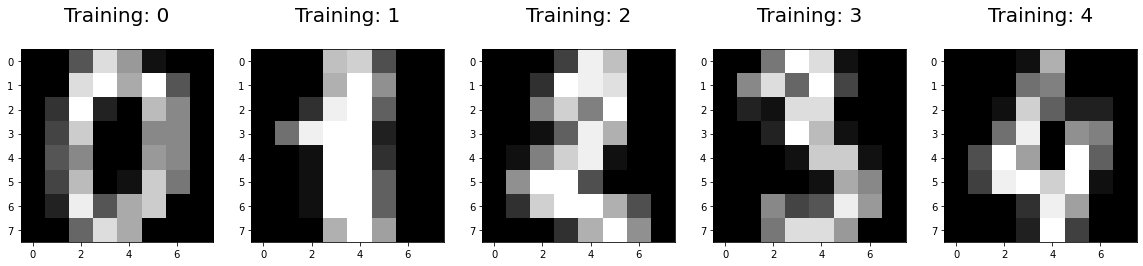

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    
# the training data and testing data

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
print("Trainning Data Shape" , x_train.shape)
print("Trainning Label Data Shape",  y_train.shape)

Trainning Data Shape (1347, 64)
Trainning Label Data Shape (1347,)


In [9]:
# the question is one vs All
# data preprocess
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
Train_Y = onehot_encoder.fit_transform(y_train)
print(Train_Y)

y_test = y_test.reshape(len(y_test), 1)
Test_Y = onehot_encoder.fit_transform(y_test)
print(Test_Y)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [151]:
def OneHotEncoder_Back(x):
    results = np.zeros([x.shape[0]])
    for i in range(x.shape[0]):
        j = np.where(x[i] == 1)[0]
        if j.size == 0:
            results[i] = 11
        else:
            results[i] = j[0]
    return results

In [170]:
class LogisticRegression():
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-3):
        self.learn_rate = learn_rate
        self.max_iter = max_iter
        self.tol = tol
        self.w = None
        self.b = None
    
    def training(self,data_x,data_y):
        self.w = np.zeros([10,data_x.shape[1]])    
        self.b = np.zeros(10)
        
        for i in range(self.max_iter):
            
            z = np.matmul(self.w,data_x.T).T + self.b
            
            grad_b = data_y - 1/(1+np.exp(-z))
            grad_b = grad_b.sum(axis=0)
            
            grad_w = np.matmul(data_x.T, (data_y - 1/(1+np.exp(-z)))).T
            
            if (np.abs(grad_w)<=self.tol).all(): 
                break
            else:
                self.w = self.w + self.learn_rate*grad_w/len(data_x) 
                self.b = self.b + self.learn_rate*grad_b/len(data_x) 
                
    def predict(self,x):       
        p = 1/(1+np.exp(-np.dot(x,self.w.T)))        
        p[np.where(p>0.5)]=1
        p[np.where(p<0.5)]=0        
        return p

In [171]:
mymodel = LogisticRegression()
mymodel.training(x_train,Train_Y)
p = mymodel.predict(x_test)

In [172]:
predicted = OneHotEncoder_Back(p)

In [173]:
actual = OneHotEncoder_Back(Test_Y)

In [174]:
accuracy = np.count_nonzero(np.array([predicted==actual]))/predicted.shape[0]

In [175]:
accuracy

0.86